# News Events Data Quality Pipeline


In [3]:
#Required Libraries
import os
import glob
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Import JSONL DATA

In [5]:
# Set input folder
input_folder = "C:/Users/biswa/Downloads/Datasets-2025-08-08/Datasets-2025-08-08"

all_records = []

#clean datatime format
def clean_datetime(dt_str):
    """Convert ISO 8601 timestamps into MySQL-friendly format."""
    if pd.isna(dt_str) or dt_str is None:
        return None
    try:
        return pd.to_datetime(dt_str, utc=True).strftime("%Y-%m-%d %H:%M:%S")
    except Exception:
        return None
#flattening the jsonl-- data was very messy

def flatten_record(record):
    """Flatten one JSON record into a dict."""
    data = record.get("data", [])[0]
    attributes = data.get("attributes", {})
    relationships = data.get("relationships", {})
    included = {i["id"]: i for i in record.get("included", [])}

    # Company
    comp_rel = relationships.get("company1", {}).get("data")
    company = included.get(comp_rel["id"], {}).get("attributes", {}) if comp_rel else {}

    # Article
    art_rel = relationships.get("most_relevant_source", {}).get("data")
    article = included.get(art_rel["id"], {}).get("attributes", {}) if art_rel else {}

    return {
        "event_id": data.get("id"),
        "event_type": data.get("type"),
        "summary": attributes.get("summary"),
        "category": attributes.get("category"),
        "found_at": clean_datetime(attributes.get("found_at")),
        "confidence": attributes.get("confidence"),
        "article_sentence": attributes.get("article_sentence"),
        "human_approved": attributes.get("human_approved"),
        "planning": attributes.get("planning"),
        "amount": attributes.get("amount"),
        "amount_normalized": attributes.get("amount_normalized"),
        "effective_date": clean_datetime(attributes.get("effective_date")),
        "headcount": attributes.get("headcount"),
        "location": attributes.get("location"),
        "company_id": comp_rel.get("id") if comp_rel else None,
        "company_name": company.get("company_name"),
        "company_domain": company.get("domain"),
        "company_ticker": company.get("ticker"),
        "article_id": art_rel.get("id") if art_rel else None,
        "article_title": article.get("title"),
        "article_url": article.get("url"),
        "article_published_at": clean_datetime(article.get("published_at")),
        "article_body": article.get("body"),
        "article_author": article.get("author"),
    }

# Load all JSONL files
for file in glob.glob(os.path.join(input_folder, "*.jsonl")):
    with open(file, "r", encoding="utf-8") as f:
        for line in f:
            if not line.strip():
                continue
            record = json.loads(line)
            all_records.append(flatten_record(record))


In [6]:
#convert to dataframe

df = pd.DataFrame(all_records)
df.head()


,event_id,event_type,summary,category,found_at,confidence,article_sentence,human_approved,planning,amount,...,company_id,company_name,company_domain,company_ticker,article_id,article_title,article_url,article_published_at,article_body,article_author
0,0020f127-3470-4cce-8989-1c79f45da217,news_event,Unipart Manufacturing Group recognized as Tran...,recognized_as,2022-07-10 20:00:00,0.8759,In addition to being named the safest organisa...,False,False,None,...,000bd323-1bf8-5c7a-9941-e6c155c29d10,Unipart Manufacturing Group,unipart.com,None,d172abc1-3755-4cef-946e-7de944806e7d,Unipart ranked the safest organisation in the ...,https://www.unipart.com/unipart-ranked-the-saf...,2022-07-10 20:00:00,Unipart has been further recognised for its un...,None
1,009be1ff-6cfb-4e9f-a415-69baf71f47f3,news_event,OOS International received award two safety aw...,receives_award,2019-12-19 10:45:17,0.9497,Since then OOS International has been an activ...,False,False,None,...,000ff896-4292-5b15-9c81-8bf4d76c10d7,OOS International,oosinternational.com,None,58c0d5fd-068d-4bab-8ac4-47e19bbdf091,OOS International Award for completing another...,https://www.oosinternational.com/oos-news/awar...,2019-12-19 10:45:17,"On behalf of CIM OOS Tiradentes, Mr Jose Marci...",admin
2,01444124-7375-4f03-8879-eb8200b31504,news_event,NWN Corporation received award Global Winner f...,receives_award,2022-07-12 20:00:00,0.6887,"As a result, with nearly 400 nominees from ove...",False,False,None,...,000d8a9c-882c-57f2-8b4c-2afc786d0fa1,NWN Corporation,nwncarousel.com,None,ef330a38-8624-41c1-8b75-d1b96e7dbd45,Skyrocketing Employee Engagement with Microsof...,https://nwncarousel.com/blog/skyrocketing-empl...,2022-07-12 22:00:00,More than 270 million people rely on Teams for...,None
3,031a304c-29ca-415e-a815-e9c915896540,news_event,Grape Solutions Plc. is developing Mobiliti ap...,is_developing,2023-04-02 22:00:00,0.5987,MVM Mobiliti and Grape Solutions have been wor...,False,False,None,...,0008b75f-9d15-54ae-b70a-52301945e397,Grape Solutions Plc.,grape.solutions,None,0525807d-6ff6-44a0-9c36-8be3afceba5b,Hungarian development makes electric vehicle c...,https://www.iqfin.net/technology/hungarian-dev...,2023-04-02 22:00:00,Grape Solutions and MVM Mobiliti partner with ...,None
4,037783ca-f3f7-4782-8a81-df3cae1ac936,news_event,"NWN Corporation launched two new kits, At-Home...",launches,2022-04-13 01:02:36,0.7180,"NWN Carousel, the leading integrated cloud com...",False,False,None,...,000d8a9c-882c-57f2-8b4c-2afc786d0fa1,NWN Corporation,nwncarousel.com,None,16061c55-111d-496a-9e3e-837dddc3454b,NWN Carousel Launches Two Hybrid Work Solution...,https://www.businesswire.com/news/home/2022041...,2022-04-13 03:00:00,"NWN Carousel, the leading integrated cloud com...",None


In [8]:
df.shape

(620785, 24)

In [9]:
df.columns

Index(['event_id', 'event_type', 'summary', 'category', 'found_at',
       'confidence', 'article_sentence', 'human_approved', 'planning',
       'amount', 'amount_normalized', 'effective_date', 'headcount',
       'location', 'company_id', 'company_name', 'company_domain',
       'company_ticker', 'article_id', 'article_title', 'article_url',
       'article_published_at', 'article_body', 'article_author'],
      dtype='object')

In [10]:
#null in each col.

df.isnull().sum()

event_id                     0
event_type                   0
summary                      0
category                     0
found_at                     0
confidence                   8
article_sentence             0
human_approved               0
planning                     0
amount                  578731
amount_normalized       578735
effective_date          374195
headcount               614552
location                450325
company_id               14768
company_name             14876
company_domain           14768
company_ticker          485190
article_id                   0
article_title                0
article_url                  0
article_published_at         0
article_body                 0
article_author          532297
dtype: int64

In [7]:
#save as csv
df.to_csv("news_events_raw.csv", index=False, encoding="utf-8")
print("Saved news_events_raw.csv")

Saved news_events_raw.csv


## Exploratory Data Analysis (EDA) 

In [11]:
df.shape

(620785, 24)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620785 entries, 0 to 620784
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   event_id              620785 non-null  object 
 1   event_type            620785 non-null  object 
 2   summary               620785 non-null  object 
 3   category              620785 non-null  object 
 4   found_at              620785 non-null  object 
 5   confidence            620777 non-null  float64
 6   article_sentence      620785 non-null  object 
 7   human_approved        620785 non-null  bool   
 8   planning              620785 non-null  bool   
 9   amount                42054 non-null   object 
 10  amount_normalized     42050 non-null   float64
 11  effective_date        246590 non-null  object 
 12  headcount             6233 non-null    float64
 13  location              170460 non-null  object 
 14  company_id            606017 non-null  object 
 15  

In [13]:
df.describe()

,confidence,amount_normalized,headcount
count,620777.000000,4.205000e+04,6.233000e+03
mean,0.603385,3.350183e+10,9.789057e+03
std,0.270955,4.397934e+12,5.827939e+04
min,0.000000,-6.000000e+09,-1.000000e+01
25%,0.448700,4.307750e+06,1.000000e+02
50%,0.648100,3.500000e+07,2.550000e+02
75%,0.798700,2.280000e+08,1.000000e+03
max,1.000000,7.500000e+14,1.750000e+06


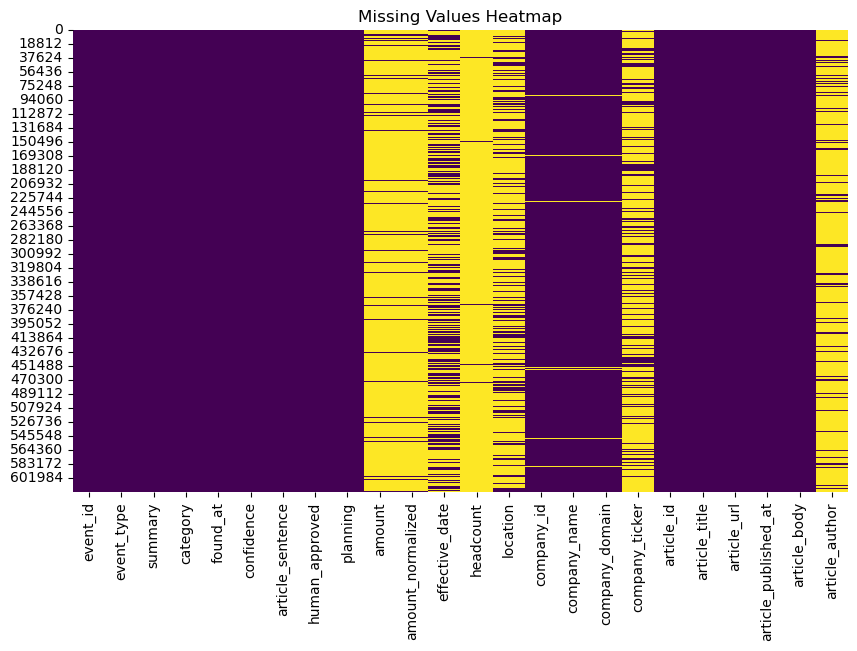

headcount               614552
amount_normalized       578735
amount                  578731
article_author          532297
company_ticker          485190
location                450325
effective_date          374195
company_name             14876
company_domain           14768
company_id               14768
confidence                   8
found_at                     0
event_type                   0
summary                      0
event_id                     0
category                     0
human_approved               0
article_sentence             0
planning                     0
article_id                   0
article_title                0
article_url                  0
article_published_at         0
article_body                 0
dtype: int64

In [14]:
#missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

df.isnull().sum().sort_values(ascending=False)


headcount, amount_normalized, amount, article_author, company_ticker, location, effective_date are having most number of missing values. In ideal senario we should drop this columns.

In [16]:
# Detect duplicates based on event_id
duplicates = df[df.duplicated(subset=["event_id"], keep=False)]

print(f"Number of duplicate event_id rows: {len(duplicates)}")

# Show first few duplicate records
duplicates.sort_values("event_id").head(10)


Number of duplicate event_id rows: 15750


,event_id,event_type,summary,category,found_at,confidence,article_sentence,human_approved,planning,amount,...,company_id,company_name,company_domain,company_ticker,article_id,article_title,article_url,article_published_at,article_body,article_author
65873,00046f9d-7d04-48df-9199-addbb03d0da8,news_event,Al Rajhi Bank partners with Zain Bahrain.,partners_with,2022-02-02 23:00:00,0.5902,Saudi Arabian lender Al Rajhi Bank has formed ...,False,False,None,...,f2b9fbac-fa2f-5e82-9452-2d84a27d64ee,Al Rajhi Bank,alrajhibank.com.sa,None,d26c8880-c121-4859-bc5e-88612a418806,Al Rajhi Bank to leverage Zain KSA’s mobile te...,https://www.retailbankerinternational.com/news...,2022-02-02 23:00:00,Saudi Arabian lender Al Rajhi Bank has formed ...,None
577966,00046f9d-7d04-48df-9199-addbb03d0da8,news_event,Al Rajhi Bank partners with Zain Bahrain.,partners_with,2022-02-02 23:00:00,0.5902,Saudi Arabian lender Al Rajhi Bank has formed ...,False,False,None,...,f2b9fbac-fa2f-5e82-9452-2d84a27d64ee,Al Rajhi Bank,alrajhibank.com.sa,None,d26c8880-c121-4859-bc5e-88612a418806,Al Rajhi Bank to leverage Zain KSA’s mobile te...,https://www.retailbankerinternational.com/news...,2022-02-02 23:00:00,Saudi Arabian lender Al Rajhi Bank has formed ...,None
134710,001c2fd5-60bb-48e3-88ee-f7fef92ebf96,news_event,SEI invests into KeyCorp.,invests_into,2019-08-27 09:57:33,0.6923,Sei Investments has invested 0.01% in KeyCorp ...,False,False,None,...,c490f562-d497-520d-af81-9f6d53795765,SEI,seic.com,NASDAQ:SEIC,6ee659af-e734-4f9a-85d4-20ca3d9f68d3,Country Club Trust Company Increased Keycorp N...,https://investtribune.com/country-club-trust-c...,2019-08-27 09:57:33,Investors sentiment increased to 1.08 in Q1 20...,None
378896,001c2fd5-60bb-48e3-88ee-f7fef92ebf96,news_event,SEI invests into KeyCorp.,invests_into,2019-08-27 09:57:33,0.6923,Sei Investments has invested 0.01% in KeyCorp ...,False,False,None,...,c490f562-d497-520d-af81-9f6d53795765,SEI,seic.com,NASDAQ:SEIC,6ee659af-e734-4f9a-85d4-20ca3d9f68d3,Country Club Trust Company Increased Keycorp N...,https://investtribune.com/country-club-trust-c...,2019-08-27 09:57:33,Investors sentiment increased to 1.08 in Q1 20...,None
400810,0026b27d-b5c0-4157-97b8-e186ed337e56,news_event,Brisbane Open House partners with Architects L...,partners_with,2025-05-30 00:00:00,0.0000,BOH has partnered with the Australian Institut...,False,False,None,...,c6ad2e48-4657-5d71-90f7-ff73140c454d,Brisbane Open House,brisbaneopenhouse.com.au,None,f3e5bccf-16c2-46a7-b241-533a7bc87826,Brisbane Open House launches full line-up,https://architectureau.com/articles/brisbane-o...,2025-05-30 00:00:00,Brisbane Open House launches full line-up.\n\n...,None
96911,0026b27d-b5c0-4157-97b8-e186ed337e56,news_event,Brisbane Open House partners with Architects L...,partners_with,2025-05-30 00:00:00,0.0000,BOH has partnered with the Australian Institut...,False,False,None,...,c6ad2e48-4657-5d71-90f7-ff73140c454d,Brisbane Open House,brisbaneopenhouse.com.au,None,f3e5bccf-16c2-46a7-b241-533a7bc87826,Brisbane Open House launches full line-up,https://architectureau.com/articles/brisbane-o...,2025-05-30 00:00:00,Brisbane Open House launches full line-up.\n\n...,None
603302,002947a1-2d62-4d0d-8c60-e537fb78cf50,news_event,LeadSquared Australia Pty identified as compet...,identified_as_competitor_of,2022-10-07 12:41:57,0.7224,"LeadSquared competes with the likes of Zoho, B...",False,False,None,...,f5abe5b5-539a-51ac-9769-cc1ba2afd929,LeadSquared Australia Pty,leadsquared.com,None,24a3f509-1be7-4190-b86f-f77a194f119f,SaaS Unicorn LeadSquared’s FY22 Loss Jump 5X T...,https://inc42.com/buzz/saas-unicorn-leadsquare...,2022-10-07 10:41:57,Bengaluru-based SaaS startup LeadSquared repor...,Debarghya Sil
327391,002947a1-2d62-4d0d-8c60-e537fb78cf50,news_event,LeadSquared Australia Pty identified as compet...,identified_as_competitor_of,2022-10-07 12:41:57,0.7224,"LeadSquared competes with the likes of Zoho, B...",False,False,None,...,f5abe5b5-539a-51ac-9769-cc1ba2afd929,Lead

I have taken event_id as a primary key in my database, so there should be no duplicate values present in the event_id column, however we have 15750 duplicate values present in the data, i will get rid of them in the upcoming data cleaning code. 

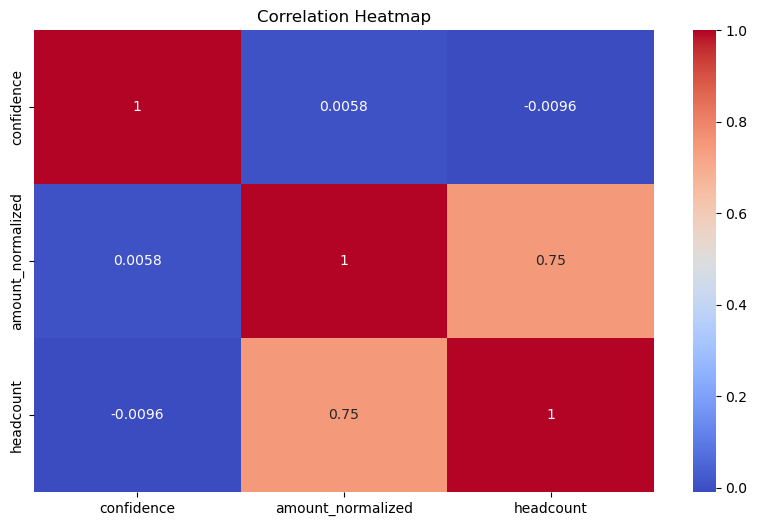

In [17]:
#correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


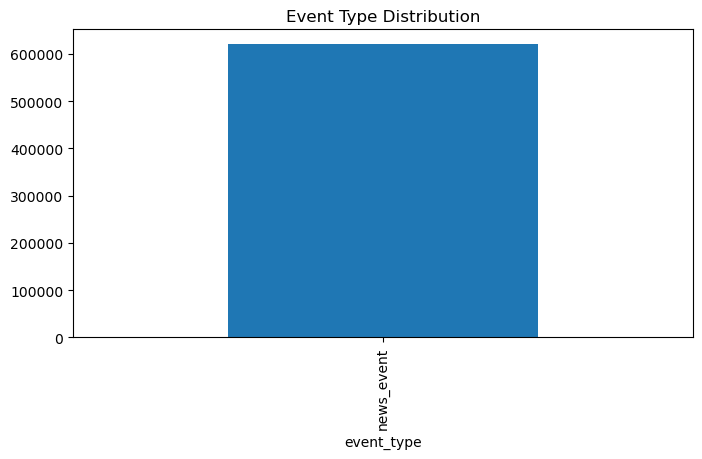

In [18]:
#univariate analysis
df["event_type"].value_counts().plot(kind="bar", figsize=(8,4), title="Event Type Distribution")
plt.show()


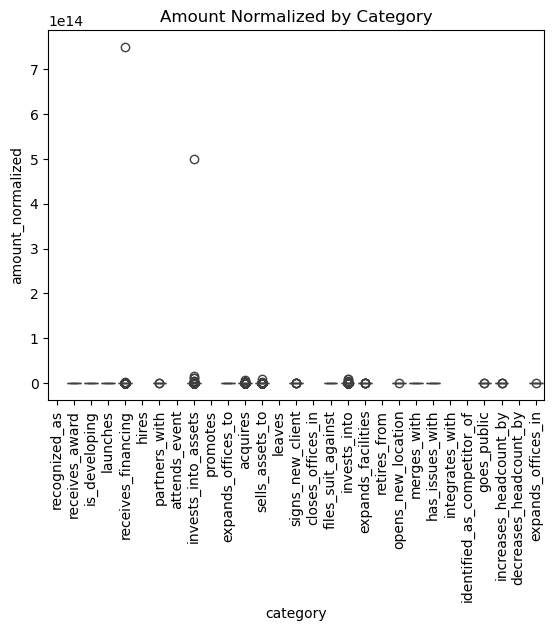

In [19]:
#bivariate analysis
sns.boxplot(data=df, x="category", y="amount_normalized")
plt.xticks(rotation=90)
plt.title("Amount Normalized by Category")
plt.show()


In [20]:
#stat profile

profile = pd.DataFrame({
    "missing": df.isnull().sum(),
    "unique": df.nunique(),
    "dtype": df.dtypes,
    "min": df.select_dtypes(include=[np.number]).min(),
    "max": df.select_dtypes(include=[np.number]).max()
})
profile


,missing,unique,dtype,min,max
amount,578731,11112,object,NaN,NaN
amount_normalized,578735,8246,float64,-6.000000e+09,7.500000e+14
article_author,532297,40123,object,NaN,NaN
article_body,0,575847,object,NaN,NaN
article_id,0,577277,object,NaN,NaN
article_published_at,0,398079,object,NaN,NaN
article_sentence,0,589468,object,NaN,NaN
article_title,0,567630,object,NaN,NaN
article_url,0,577277,object,NaN,NaN
category,0,29,object,NaN,NaN


# Data Quality Dimensions Report

In [21]:
#data quality improvements
# Replace NaN with None for MySQL compatibility--> MySql do not accept NaN

df = df.replace({np.nan: None})

# Drop duplicates
df = df.drop_duplicates(subset=["event_id"], keep="first")

print("✅ Cleaned data: NaN -> None, duplicates removed")


✅ Cleaned data: NaN -> None, duplicates removed


In [23]:
# Returns True if any duplicate event_id exists
has_duplicates = df["event_id"].duplicated().any()
print("Duplicates exist:", has_duplicates)

Duplicates exist: False


In [ ]:
#cleaned final csv
df.to_csv("news_events_cleaned.csv", index=False, encoding="utf-8")
print("Saved cleaned dataset!")


In [22]:
# Save as CSV--final
output_path = "C:/Users/biswa/Downloads/Datasets-2025-08-08/news_events_cleaned.csv"
df.to_csv(output_path, index=False)

print(f"Saved {len(df)} records into {output_path}")


Saved 612910 records into C:/Users/biswa/Downloads/Datasets-2025-08-08/news_events_cleaned.csv


# MYSQL CONNECTION  

In [24]:
from sqlalchemy import create_engine

# Load CSV into DataFrame
df = pd.read_csv("C:\\Users\\biswa\\Downloads\\Datasets-2025-08-08\\news_events_cleaned.csv")

# MySQL connection
username = "root"
password = "290506"
host = "localhost"
port = 3306
database = "news_events_db"

# Create SQLAlchemy engine using pymysql
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")


In [25]:
try:
    conn = engine.connect()
    print("✅ Connection successful!")
    conn.close()
except Exception as e:
    print("❌ Connection failed:", e)

✅ Connection successful!


In [29]:
#LOAD DATA INTO MYSQL

from sqlalchemy import create_engine, text

# Configure DB connection
user = "root"
password = "290506"
host = "localhost"
database = "news_events_db"

# Create connection engine
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}/{database}")


# ===========================
# Insert Data with Duplicates Handling
# ===========================
insert_query = """
INSERT INTO news_events (
    event_id, event_type, summary, category, found_at, confidence, article_sentence,
    human_approved, planning, amount, amount_normalized, effective_date, headcount, location,
    company_id, company_name, company_domain, company_ticker, article_id,
    article_title, article_url, article_published_at, article_body, article_author
)
VALUES (
    :event_id, :event_type, :summary, :category, :found_at, :confidence, :article_sentence,
    :human_approved, :planning, :amount, :amount_normalized, :effective_date, :headcount, :location,
    :company_id, :company_name, :company_domain, :company_ticker, :article_id,
    :article_title, :article_url, :article_published_at, :article_body, :article_author
)
ON DUPLICATE KEY UPDATE
    event_type = VALUES(event_type),
    summary = VALUES(summary),
    category = VALUES(category),
    found_at = VALUES(found_at),
    confidence = VALUES(confidence),
    article_sentence = VALUES(article_sentence),
    human_approved = VALUES(human_approved),
    planning = VALUES(planning),
    amount = VALUES(amount),
    amount_normalized = VALUES(amount_normalized),
    effective_date = VALUES(effective_date),
    headcount = VALUES(headcount),
    location = VALUES(location),
    company_id = VALUES(company_id),
    company_name = VALUES(company_name),
    company_domain = VALUES(company_domain),
    company_ticker = VALUES(company_ticker),
    article_id = VALUES(article_id),
    article_title = VALUES(article_title),
    article_url = VALUES(article_url),
    article_published_at = VALUES(article_published_at),
    article_body = VALUES(article_body),
    article_author = VALUES(article_author);
"""

# Replace NaN with None (important for MySQL insert)
df_clean = df.replace({np.nan: None})

# Insert row by row with duplicate handling
with engine.begin() as conn:
    for _, row in df_clean.iterrows():
        conn.execute(text(insert_query), row.to_dict())

print("✅ Data loaded into MySQL with duplicate handling")


✅ Data loaded into MySQL with duplicate handling


In [30]:
df.describe()

,confidence,amount_normalized,headcount
count,612902.000000,4.128300e+04,6.233000e+03
mean,0.604384,3.406106e+10,9.789057e+03
std,0.270933,4.438595e+12,5.827939e+04
min,0.000000,-6.000000e+09,-1.000000e+01
25%,0.450000,4.207000e+06,1.000000e+02
50%,0.648900,3.500000e+07,2.550000e+02
75%,0.799700,2.250000e+08,1.000000e+03
max,1.000000,7.500000e+14,1.750000e+06


In [31]:
#stat profile

profile = pd.DataFrame({
    "missing": df.isnull().sum(),
    "unique": df.nunique(),
    "dtype": df.dtypes,
    "min": df.select_dtypes(include=[np.number]).min(),
    "max": df.select_dtypes(include=[np.number]).max()
})
profile


,missing,unique,dtype,min,max
amount,571623,11112,object,NaN,NaN
amount_normalized,571627,8246,float64,-6.000000e+09,7.500000e+14
article_author,526592,40121,object,NaN,NaN
article_body,0,575847,object,NaN,NaN
article_id,0,577277,object,NaN,NaN
article_published_at,0,398079,object,NaN,NaN
article_sentence,0,589468,object,NaN,NaN
article_title,22,567629,object,NaN,NaN
article_url,0,577277,object,NaN,NaN
category,0,29,object,NaN,NaN
